In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time



In [2]:
dow_jones_df= pd.read_csv('/Users/dianeshomefolder/Desktop/Dow Jones/dow_jones2.csv')
#dow_jones_df.set_index('timestamp')
dow_jones_df.head()


,timestamp,open,high,low,close,volume
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000


In [3]:
# Create a new column ('close-minus-open') and perform the calculation
dow_jones_close = dow_jones_df
dow_jones_close['close-open'] = dow_jones_df['close'] - dow_jones_close['open']
dow_jones_close.head()


,timestamp,open,high,low,close,volume,close-open
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410


In [4]:
# Tried to put close-open positive values in own column - didn't work
#for x in dow_jones_close['close-open'] >0:
    #dow_jones_close['positives'] = x
#else:
    #dow_jones_close['positives'] = ''
#dow_jones_close.head()

In [5]:
dow_jones_close['daily percent change'] = dow_jones_close['close-open']/dow_jones_close['open']*100
dow_jones_close.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,-0.618847
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,-0.418419
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,0.387096
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,-0.837095
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,0.366986


In [6]:
# Check to see if the new column is a float vs. a string
type(dow_jones_close['daily percent change'][1])

numpy.float64

In [7]:
# This code changes the 'close-minus-open' column from a string to a float number
dow_jones_close['close-open'] = [float(x) for x in dow_jones_close['close-open']]
dow_jones_close.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,-0.618847
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,-0.418419
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,0.387096
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,-0.837095
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,0.366986


In [8]:
#check that close-open are now float numbers vs. string
a = dow_jones_close['close-open'][0] - dow_jones_close['close-open'][1]
print(a)

-54.019499999998516


In [9]:
#dow_jones_close['timestamp'] = [x.replace('-', '') for x in dow_jones_close['timestamp']]
#dow_jones_close['timestamp'] = [int(x) for x in dow_jones_close['timestamp']]
#dow_jones_close.head()

In [10]:
# Remove the index column and let timestamp (which is year-month-day) be the index
dow_jones_close_no_index = dow_jones_close.set_index('timestamp')
dow_jones_close_no_index.head()


,open,high,low,close,volume,close-open,daily percent change
timestamp,,,,,,,
2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,-0.618847
2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,-0.418419
2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,0.387096
2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,-0.837095
2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,0.366986


In [11]:
dow_jones_close_no_index['close-open +']=dow_jones_close_no_index['close-open'].where(dow_jones_close_no_index['close-open']>0).apply(np.mean)
dow_jones_close_no_index


,open,high,low,close,volume,close-open,daily percent change,close-open +
timestamp,,,,,,,,
2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,-0.618847,NaN
2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,-0.418419,NaN
2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,0.387096,104.0000
2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,-0.837095,NaN
2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,0.366986,98.5410
2019-09-20,27102.1797,27194.7500,26926.6797,26935.0703,497640000,-167.1094,-0.616590,NaN
2019-09-19,27186.0508,27272.1699,27064.2109,27094.7891,212360000,-91.2617,-0.335693,NaN
2019-09-18,27075.3906,27161.9297,26899.1504,27147.0801,212860000,71.6895,0.264777,71.6895
2019-09-17,27010.1191,27110.8008,26984.1406,27110.8008,223580000,100.6817,0.372755,100.6817


In [12]:
#check that close-open are now float numbers vs. string
#b = dow_jones_close['timestamp'][0] - dow_jones_close['timestamp'][1]
#print(b)

In [13]:
dow_negatives = dow_jones_close_no_index.lt(0).sum().sum() 
print(dow_negatives)

4624


In [14]:
# Total number of days the market was up (+), down (-), or neutral from 1/3/2000-9/27/2019
negatives = len(dow_jones_close_no_index.loc[(dow_jones_close_no_index['close-open'] < 0)])    
positives = len(dow_jones_close_no_index.loc[(dow_jones_close_no_index['close-open'] > 0)])
neutrals =  len(dow_jones_close_no_index.loc[(dow_jones_close_no_index['close-open'] == 0)])
print('Dow Jones negatives', negatives) 
print('Dow Jones positives', positives)
print('Dow Jones neutrals ', neutrals)


Dow Jones negatives 2312
Dow Jones positives 2651
Dow Jones neutrals  3


In [15]:
# Begin with all the election-to-inauguration dates (Trump, Obama 1, Bush 1, Obama 2, Bush 2)

In [16]:
# Create a database for dates between Trump's election (11/8/2016) 
# and his inauguration (1/20/2017)    where ea stands for election to inauguration
trump_ea_df = dow_jones_close[676:726]
trump_ea_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
676,2017-01-20,19795.0605,19843.9395,19759.1406,19827.2500,435260000,32.1895,0.162614
677,2017-01-19,19813.5508,19824.1406,19677.9395,19732.4004,301750000,-81.1504,-0.409570
678,2017-01-18,19822.7305,19828.1992,19739.0000,19804.7207,279760000,-18.0098,-0.090854
679,2017-01-17,19848.8203,19882.9902,19775.3496,19826.7695,341900000,-22.0508,-0.111094
680,2017-01-13,19912.5391,19952.0293,19849.3809,19885.7305,263780000,-26.8086,-0.134632


In [17]:
trump_ea_date_index = trump_ea_df.set_index('timestamp')
trump_ea_date_index.head()

,open,high,low,close,volume,close-open,daily percent change
timestamp,,,,,,,
2017-01-20,19795.0605,19843.9395,19759.1406,19827.2500,435260000,32.1895,0.162614
2017-01-19,19813.5508,19824.1406,19677.9395,19732.4004,301750000,-81.1504,-0.409570
2017-01-18,19822.7305,19828.1992,19739.0000,19804.7207,279760000,-18.0098,-0.090854
2017-01-17,19848.8203,19882.9902,19775.3496,19826.7695,341900000,-22.0508,-0.111094
2017-01-13,19912.5391,19952.0293,19849.3809,19885.7305,263780000,-26.8086,-0.134632


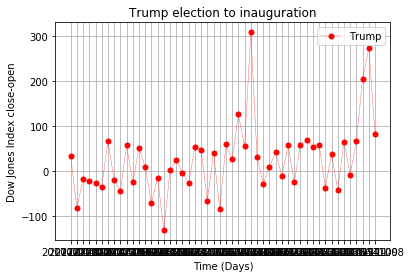

In [18]:
# Generate the Plot (Accounting for percentages)
# set limit of x (all drug data ends at 45 days)
#x_lower = survival_rates_percent['Timepoint'[0]]
#x_upper = survival_rates_percent['Timepoint'[-1]]
#plt.xticks(x_lower, x_upper, 10)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Plot 4 drugs plus placebo for survival rates (percentage) over days (Timepoint)
plt.plot(trump_ea_date_index["close-open"], "red", linestyle="dashed", marker = 'o', markersize=5, linewidth=0.40)
#plt.plot("blue", linestyle="dashed", marker='^', markersize=5, linewidth=0.40)
#plt.plot("green", linestyle="dashed", marker='s', markersize=5, linewidth=0.40)
#plt.plot("brown", linestyle="dashed", marker='x', markersize=5, linewidth=0.40)
#plt.plot("black", linestyle="dashed", marker='d', markersize=5, linewidth=0.40)

# Create a title, x label, and y label for our chart
plt.title("Trump election to inauguration")
plt.xlabel("Time (Days)")
plt.ylabel("Dow Jones Index close-open")

# Set a grid on the plot
ax.xaxis.grid()
ax.yaxis.grid()

# Add the legend
plt.legend(['Trump'], loc='best')
# Show the Figure


In [19]:
# Calculate the number of days the market was up (+), down (-), or neutral 
trump_ea_negatives = len(trump_ea_df.loc[(trump_ea_df['close-open'] < 0)])    
trump_ea_positives = len(trump_ea_df.loc[(trump_ea_df['close-open'] > 0)])
trump_ea_neutrals =  len(trump_ea_df.loc[(trump_ea_df['close-open'] == 0)])
print('Trump ea negatives', trump_ea_negatives) 
print('Trump ea positives', trump_ea_positives)
print('Trump ea neutrals ', trump_ea_neutrals)


Trump ea negatives 21
Trump ea positives 29
Trump ea neutrals  0


In [20]:
# Create a database for dates between Obama's first term election date (11/4/2008) 
# and his first term inauguration (1/20/2009)  where ea stands for election to inauguration
obama_ea1_df = dow_jones_close[2691:2743]
obama_ea1_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
2691,2009-01-20,8279.6299,8291.9805,7939.9302,7949.0898,419200000,-330.5401,-3.992209
2692,2009-01-16,8215.6699,8341.2002,8109.3398,8281.2197,439360000,65.5498,0.797863
2693,2009-01-15,8196.2402,8286.1602,7995.1299,8212.4902,436660000,16.2500,0.198262
2694,2009-01-14,8446.0098,8446.2500,8140.7202,8200.1396,355050000,-245.8702,-2.911081
2695,2009-01-13,8474.6104,8522.0801,8376.8799,8448.5596,304050000,-26.0508,-0.307398


In [21]:
# Find the number of days the market was up (+), down (-), or neutral for Obama ea 1st term
obama_ea1_negatives = len(obama_ea1_df.loc[(obama_ea1_df['close-open'] < 0)])    
obama_ea1_positives = len(obama_ea1_df.loc[(obama_ea1_df['close-open'] > 0)])
obama_ea1_neutrals =  len(obama_ea1_df.loc[(obama_ea1_df['close-open'] == 0)])
print('Obama ea1 negatives', obama_ea1_negatives) 
print('Obama ea1 positives', obama_ea1_positives)
print('Obama ea1 neutrals ', obama_ea1_neutrals)

Obama ea1 negatives 28
Obama ea1 positives 24
Obama ea1 neutrals  0


In [22]:
# Create a database for dates between Bush's first term election (11/7/2000) 
# and his first term inauguration (1/20/2001)    where ea stands for election to inauguration
# January 20, 2001 was a Saturday (stock market closed) so data is through 1/19/2001
bush_ea1_df = dow_jones_close[4701:4751]
bush_ea1_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
4701,2001-01-19,10686.0000,10717.7197,10564.0098,10587.5898,363100000,-98.4102,-0.920926
4702,2001-01-18,10584.5703,10737.2402,10567.4697,10678.2803,307320000,93.7100,0.885345
4703,2001-01-17,10660.9502,10705.9297,10545.2998,10584.3398,304800000,-76.6104,-0.718608
4704,2001-01-16,10525.7803,10664.0498,10486.6396,10652.6602,233330000,126.8799,1.205420
4705,2001-01-12,10608.7402,10623.8896,10468.0400,10525.3799,247020000,-83.3603,-0.785770


In [23]:
# Find the number of days the market was up (+), down (-), or neutral for Bush ea 1st term
bush_ea1_negatives = len(bush_ea1_df.loc[(bush_ea1_df['close-open'] < 0)])    
bush_ea1_positives = len(bush_ea1_df.loc[(bush_ea1_df['close-open'] > 0)])
bush_ea1_neutrals =  len(bush_ea1_df.loc[(bush_ea1_df['close-open'] == 0)])
print('Bush ea1 negatives', bush_ea1_negatives) 
print('Bush ea1 positives', bush_ea1_positives)
print('Bush ea1 neutrals ', bush_ea1_neutrals)

Bush ea1 negatives 27
Bush ea1 positives 23
Bush ea1 neutrals  0


In [24]:
# Create a database for dates between Obama's second term election date (11/6/2012) 
# and his second term inauguration (1/20/2013)  where ea stands for election to inauguration
# January 20, 2013 was a Sunday (stock market closed) so data is through Friday 1/18/2013 
obama_ea2_df = dow_jones_close[1684:1735]
obama_ea2_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
1684,2013-01-18,13596.0195,13649.9297,13571.8604,13649.7002,260900000,53.6807,0.394827
1685,2013-01-17,13511.2305,13633.8896,13510.2402,13596.0195,183900000,84.7890,0.627545
1686,2013-01-16,13534.8896,13534.8896,13468.9600,13511.2305,118540000,-23.6591,-0.174801
1687,2013-01-15,13507.3203,13546.3701,13445.7998,13534.8896,102280000,27.5693,0.204106
1688,2013-01-14,13488.4297,13520.1797,13459.8398,13507.3203,118460000,18.8906,0.140050


In [25]:
# Find the number of days the market was up (+), down (-), or neutral for Obama 2nd ea
obama_ea2_negatives = len(obama_ea2_df.loc[(obama_ea2_df['close-open'] < 0)])    
obama_ea2_positives = len(obama_ea2_df.loc[(obama_ea2_df['close-open'] > 0)])
obama_ea2_neutrals =  len(obama_ea2_df.loc[(obama_ea2_df['close-open'] == 0)])
print('Obama ea2 negatives', obama_ea2_negatives) 
print('Obama ea2 positives', obama_ea2_positives)
print('Obama ea2 neutrals ', obama_ea2_neutrals)

Obama ea2 negatives 24
Obama ea2 positives 27
Obama ea2 neutrals  0


In [26]:
obama_ea2_date_index = obama_ea2_df.set_index('timestamp')
obama_ea2_date_index.head()

,open,high,low,close,volume,close-open,daily percent change
timestamp,,,,,,,
2013-01-18,13596.0195,13649.9297,13571.8604,13649.7002,260900000,53.6807,0.394827
2013-01-17,13511.2305,13633.8896,13510.2402,13596.0195,183900000,84.7890,0.627545
2013-01-16,13534.8896,13534.8896,13468.9600,13511.2305,118540000,-23.6591,-0.174801
2013-01-15,13507.3203,13546.3701,13445.7998,13534.8896,102280000,27.5693,0.204106
2013-01-14,13488.4297,13520.1797,13459.8398,13507.3203,118460000,18.8906,0.140050


In [27]:
# Create a database for dates between Bush's re-election (11/2/2004) 
# and his second inauguration (1/20/2005)    where ea stands for election to inauguration
bush_ea2_df = dow_jones_close[3697:3752]
bush_ea2_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
3697,2005-01-20,10538.9004,10546.7695,10457.9404,10471.4697,242810000,-67.4307,-0.639827
3698,2005-01-19,10626.0498,10626.2803,10536.4902,10539.9697,242250000,-86.0801,-0.810086
3699,2005-01-18,10554.2305,10628.9404,10500.5801,10628.7900,267680000,74.5595,0.706442
3700,2005-01-14,10506.7100,10567.0098,10503.7598,10558.0000,223070000,51.2900,0.488164
3701,2005-01-13,10617.4102,10618.1504,10485.7305,10505.8301,271180000,-111.5801,-1.050916


In [28]:
# Find the number of days the market was up (+), down (-), or neutral for Bush ea 1st term
bush_ea2_negatives = len(bush_ea2_df.loc[(bush_ea2_df['close-open'] < 0)])    
bush_ea2_positives = len(bush_ea2_df.loc[(bush_ea2_df['close-open'] > 0)])
bush_ea2_neutrals =  len(bush_ea2_df.loc[(bush_ea2_df['close-open'] == 0)])
print('Bush ea2 negatives', bush_ea2_negatives) 
print('Bush ea2 positives', bush_ea2_positives)
print('Bush ea2 neutrals ', bush_ea2_neutrals)

Bush ea2 negatives 24
Bush ea2 positives 31
Bush ea2 neutrals  0


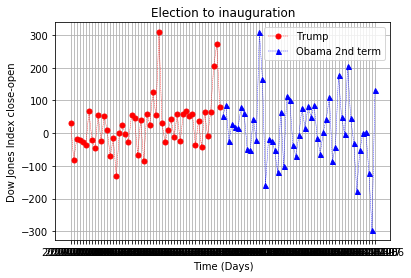

In [29]:
# Generate the Plot (Accounting for percentages)
# set limit of x (all drug data ends at 45 days)
#x_lower = survival_rates_percent['Timepoint'[0]]
#x_upper = survival_rates_percent['Timepoint'[-1]]
#plt.xticks(x_lower, x_upper, 10)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Plot 4 drugs plus placebo for survival rates (percentage) over days (Timepoint)
plt.plot(trump_ea_date_index["close-open"], "red", linestyle="dashed", marker = 'o', markersize=5, linewidth=0.40)
plt.plot(obama_ea2_date_index["close-open"], "blue", linestyle="dashed", marker='^', markersize=5, linewidth=0.40)
#plt.plot("green", linestyle="dashed", marker='s', markersize=5, linewidth=0.40)
#plt.plot("brown", linestyle="dashed", marker='x', markersize=5, linewidth=0.40)
#plt.plot("black", linestyle="dashed", marker='d', markersize=5, linewidth=0.40)

# Create a title, x label, and y label for our chart
plt.title("Election to inauguration")
plt.xlabel("Time (Days)")
plt.ylabel("Dow Jones Index close-open")

# Set a grid on the plot
ax.xaxis.grid()
ax.yaxis.grid()

# Add the legend
plt.legend(['Trump', 'Obama 2nd term'], loc='best')
# Show the Figure

In [30]:
# Next find the data for inauguration-day-to-inauguration-day (President's actual term)
# In Trump's case, inauguration day to latest data collection date (9/27/2019)

In [31]:
# Create a database for dates between Trump's term to date, in other words
# his inauguration (1/20/2017) to data collection endpoint (9/27/2018)
trump_term_df = dow_jones_close[0:677]
trump_term_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,-0.618847
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,-0.418419
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,0.387096
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,-0.837095
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,0.366986


In [32]:
# Find the number of days the market was up (+), down (-), or neutral during Trump's term
trump_term_negatives = len(trump_term_df.loc[(trump_term_df['close-open'] < 0)])    
trump_term_positives = len(trump_term_df.loc[(trump_term_df['close-open'] > 0)])
trump_term_neutrals =  len(trump_term_df.loc[(trump_term_df['close-open'] == 0)])
trump_close_minus_open_total = trump_term_df['close-open'].sum()
trump_daily_percent_change_sum = trump_term_df['daily percent change'].sum()

print('Trump term negatives', trump_term_negatives) 
print('Trump term positives', trump_term_positives)
print('Trump term neutrals ', trump_term_neutrals)
print('Trump term sum of all close-open', '{0:.2f}'.format(trump_close_minus_open_total))
print('Trump term sum of daily percent change', '{0:.2f}'.format(trump_daily_percent_change_sum))



Trump term negatives 299
Trump term positives 378
Trump term neutrals  0
Trump term sum of all close-open 1707.51
Trump term sum of daily percent change 10.24


In [33]:
# Create a database for dates of Obama's first term from first inauguration (1/20/2009)
# to end of first term (1/19/2013) (Jan. 19th was a Saturday, market end Fr. 1/18/13)
obama_term1_df = dow_jones_close[1684:2692]
obama_term1_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
1684,2013-01-18,13596.0195,13649.9297,13571.8604,13649.7002,260900000,53.6807,0.394827
1685,2013-01-17,13511.2305,13633.8896,13510.2402,13596.0195,183900000,84.7890,0.627545
1686,2013-01-16,13534.8896,13534.8896,13468.9600,13511.2305,118540000,-23.6591,-0.174801
1687,2013-01-15,13507.3203,13546.3701,13445.7998,13534.8896,102280000,27.5693,0.204106
1688,2013-01-14,13488.4297,13520.1797,13459.8398,13507.3203,118460000,18.8906,0.140050


In [34]:
# Find the number of days the market was up (+), down (-), or neutral for Obama's 1st term
obama_term1_negatives = len(obama_term1_df.loc[(obama_term1_df['close-open'] < 0)])    
obama_term1_positives = len(obama_term1_df.loc[(obama_term1_df['close-open'] > 0)])
obama_term1_neutrals =  len(obama_term1_df.loc[(obama_term1_df['close-open'] == 0)])
obama1_close_minus_open_total = obama_term1_df['close-open'].sum()
obama1_daily_percent_change_sum = obama_term1_df['daily percent change'].sum()

print('Obama term 1 negatives', obama_term1_negatives) 
print('Obama term 1 positives', obama_term1_positives)
print('Obama term 1 neutrals ', obama_term1_neutrals)
print('Obama term 1 sum of all close-open', '{0:.2f}'.format(obama1_close_minus_open_total))
print('Obama term 1 sum of daily percent change', '{0:.2f}'.format(obama1_daily_percent_change_sum))



Obama term 1 negatives 456
Obama term 1 positives 551
Obama term 1 neutrals  1
Obama term 1 sum of all close-open 6597.03
Obama term 1 sum of daily percent change 67.90


In [35]:
# Create a database for Bush's first term inauguration (1/22/2001)
# to end of first term (1/19/2005)
# January 20, 2001 was a Saturday (stock market closed)
bush_term1_df = dow_jones_close[3698:4701]
bush_term1_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
3698,2005-01-19,10626.0498,10626.2803,10536.4902,10539.9697,242250000,-86.0801,-0.810086
3699,2005-01-18,10554.2305,10628.9404,10500.5801,10628.7900,267680000,74.5595,0.706442
3700,2005-01-14,10506.7100,10567.0098,10503.7598,10558.0000,223070000,51.2900,0.488164
3701,2005-01-13,10617.4102,10618.1504,10485.7305,10505.8301,271180000,-111.5801,-1.050916
3702,2005-01-12,10561.3203,10622.8799,10499.4697,10617.7803,293140000,56.4600,0.534592


In [36]:
# Find the number of days the market was up (+), down (-), or neutral for Bush's 1st term
bush_term1_negatives = len(bush_term1_df.loc[(bush_term1_df['close-open'] < 0)])    
bush_term1_positives = len(bush_term1_df.loc[(bush_term1_df['close-open'] > 0)])
bush_term1_neutrals =  len(bush_term1_df.loc[(bush_term1_df['close-open'] == 0)])
bush1_close_minus_open_total = bush_term1_df['close-open'].sum()
bush1_daily_percent_change_sum = bush_term1_df['daily percent change'].sum()

print('Bush term 1 negatives', bush_term1_negatives) 
print('Bush term 1 positives', bush_term1_positives)
print('Bush term 1 neutrals ', bush_term1_neutrals)
print('Bush term 1 sum of all close-open', '{0:.2f}'.format(bush1_close_minus_open_total))
print('Bush term 1 sum of daily percent change', '{0:.2f}'.format(bush1_daily_percent_change_sum))

Bush term 1 negatives 494
Bush term 1 positives 509
Bush term 1 neutrals  0
Bush term 1 sum of all close-open 771.47
Bush term 1 sum of daily percent change 15.18


In [37]:
# Create a database for dates of Obama's second term from second inauguration (1/21/2013)
# to last day in office (1/19/2017) 
# Jan. 20, 2013 was a Sunday and MLK day Monday 1/21/2013, so begin 1/22/13
obama_term2_df = dow_jones_close[677:1684]
obama_term2_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
677,2017-01-19,19813.5508,19824.1406,19677.9395,19732.4004,301750000,-81.1504,-0.409570
678,2017-01-18,19822.7305,19828.1992,19739.0000,19804.7207,279760000,-18.0098,-0.090854
679,2017-01-17,19848.8203,19882.9902,19775.3496,19826.7695,341900000,-22.0508,-0.111094
680,2017-01-13,19912.5391,19952.0293,19849.3809,19885.7305,263780000,-26.8086,-0.134632
681,2017-01-12,19926.2109,19929.2891,19770.4707,19891.0000,306290000,-35.2109,-0.176706


In [38]:
# Find the number of days the market was up (+), down (-), or neutral for Obama's 2nd term
obama_term2_negatives = len(obama_term2_df.loc[(obama_term2_df['close-open'] < 0)])    
obama_term2_positives = len(obama_term2_df.loc[(obama_term2_df['close-open'] > 0)])
obama_term2_neutrals =  len(obama_term2_df.loc[(obama_term2_df['close-open'] == 0)])
obama2_close_minus_open_total = obama_term2_df['close-open'].sum()
obama2_daily_percent_change_sum = obama_term2_df['daily percent change'].sum()

print('Obama term 2 negatives', obama_term2_negatives) 
print('Obama term 2 positives', obama_term2_positives)
print('Obama term 2 neutrals ', obama_term2_neutrals)
print('Obama term 1 sum of all close-open', '{0:.2f}'.format(obama2_close_minus_open_total))
print('Obama term 2 sum of daily percent change', '{0:.2f}'.format(obama2_daily_percent_change_sum))

Obama term 2 negatives 466
Obama term 2 positives 541
Obama term 2 neutrals  0
Obama term 1 sum of all close-open 5303.42
Obama term 2 sum of daily percent change 35.30


In [39]:
# Create a database for Bush's second term inauguration (1/20/2005)
# to last day in office 1/19/2009 but that was a Sunday, so stop Friday before 1/16/2009.
bush_term2_df = dow_jones_close[2692:3698]
bush_term2_df.head()

,timestamp,open,high,low,close,volume,close-open,daily percent change
2692,2009-01-16,8215.6699,8341.2002,8109.3398,8281.2197,439360000,65.5498,0.797863
2693,2009-01-15,8196.2402,8286.1602,7995.1299,8212.4902,436660000,16.2500,0.198262
2694,2009-01-14,8446.0098,8446.2500,8140.7202,8200.1396,355050000,-245.8702,-2.911081
2695,2009-01-13,8474.6104,8522.0801,8376.8799,8448.5596,304050000,-26.0508,-0.307398
2696,2009-01-12,8599.2598,8602.5996,8421.0801,8473.9697,273550000,-125.2901,-1.456987


In [40]:
# Find the number of days the market was up (+), down (-), or neutral for Bush's 2nd term
bush_term2_negatives = len(bush_term2_df.loc[(bush_term2_df['close-open'] < 0)])    
bush_term2_positives = len(bush_term2_df.loc[(bush_term2_df['close-open'] > 0)])
bush_term2_neutrals =  len(bush_term2_df.loc[(bush_term2_df['close-open'] == 0)])
bush2_daily_percent_change_sum = bush_term2_df['daily percent change'].sum()

print('Bush term 2 negatives', bush_term2_negatives) 
print('Bush term 2 positives', bush_term2_positives)
print('Bush term 2 neutrals', bush_term2_neutrals)
print('Bush term 2 sum of daily percent change', '{0:.2f}'.format(bush2_daily_percent_change_sum))


Bush term 2 negatives 468
Bush term 2 positives 536
Bush term 2 neutrals 2
Bush term 2 sum of daily percent change -5.52


In [41]:
# Create new dataframe to hold above values for "election-to-inauguration" data 
# Data
data = [{
    'Date Range': 'Trump election-to-inauguration', 'Negative Close':trump_ea_negatives, 'Positive Close': trump_ea_positives, 'Neutral Close':trump_ea_neutrals},
    {'Date Range':'Obama election-to-inauguration 1', 'Negative Close':obama_ea1_negatives, 'Positive Close': obama_ea1_positives, 'Neutral Close':obama_ea1_neutrals},
    {'Date Range': 'Bush election-to-inauguration 1', 'Negative Close':bush_ea1_negatives, 'Positive Close': bush_ea1_positives, 'Neutral Close':bush_ea1_neutrals},
    {'Date Range': 'Obama election-to-inauguration 2', 'Negative Close':obama_ea2_negatives, 'Positive Close': obama_ea2_positives, 'Neutral Close':obama_ea2_neutrals},
    {'Date Range': 'Bush election-to-inauguration 2', 'Negative Close':bush_ea2_negatives, 'Positive Close': bush_ea2_positives, 'Neutral Close':bush_ea2_neutrals},
    {'Date Range': 'Overall 2000-2019', 'Negative Close':negatives, 'Positive Close': positives, 'Neutral Close':neutrals}
] 

# Make the DataFrame
election_to_inauguration_df = pd.DataFrame(data)

# Add calculated column: Percent Positive
election_to_inauguration_df['Percent Positive'] = election_to_inauguration_df['Positive Close']/(election_to_inauguration_df['Negative Close']+election_to_inauguration_df['Neutral Close']+election_to_inauguration_df['Positive Close'])*100

# Print DataFrame. 
election_to_inauguration_df


,Date Range,Negative Close,Neutral Close,Positive Close,Percent Positive
0,Trump election-to-inauguration,21,0,29,58.000000
1,Obama election-to-inauguration 1,28,0,24,46.153846
2,Bush election-to-inauguration 1,27,0,23,46.000000
3,Obama election-to-inauguration 2,24,0,27,52.941176
4,Bush election-to-inauguration 2,24,0,31,56.363636
5,Overall 2000-2019,2312,3,2651,53.383004


In [42]:
# Create new dataframe to hold above values for term data (inauguration to last-day-in-office)
# Data
data = [{
    'Date Range': 'Trump term 1', 'Negative Close':trump_term_negatives, 'Positive Close': trump_term_positives, 'Neutral Close':trump_term_neutrals},
    {'Date Range':'Obama term 1', 'Negative Close':obama_term1_negatives, 'Positive Close': obama_term1_positives, 'Neutral Close':obama_term1_neutrals},
    {'Date Range': 'Bush term 1', 'Negative Close':bush_term1_negatives, 'Positive Close': bush_term1_positives, 'Neutral Close':bush_term1_neutrals},
    {'Date Range': 'Obama term 2', 'Negative Close':obama_term2_negatives, 'Positive Close': obama_term2_positives, 'Neutral Close':obama_term2_neutrals},
    {'Date Range': 'Bush term 2', 'Negative Close':bush_term2_negatives, 'Positive Close': bush_term2_positives, 'Neutral Close':bush_term2_neutrals},
    {'Date Range': 'Overall 2000-2019', 'Negative Close':negatives, 'Positive Close': positives, 'Neutral Close':neutrals}
] 

# Make the DataFrame
terms_df = pd.DataFrame(data) 

# Add calculated column: Percent Positive
terms_df['Percent Positive'] = terms_df['Positive Close']/(terms_df['Negative Close']+terms_df['Neutral Close']+terms_df['Positive Close'])*100

# Print DataFrame. 
terms_df

,Date Range,Negative Close,Neutral Close,Positive Close,Percent Positive
0,Trump term 1,299,0,378,55.834564
1,Obama term 1,456,1,551,54.662698
2,Bush term 1,494,0,509,50.747757
3,Obama term 2,466,0,541,53.723932
4,Bush term 2,468,2,536,53.280318
5,Overall 2000-2019,2312,3,2651,53.383004


In [43]:
# Create 

In [44]:
# Create new dataframe to hold above values for election to last-day-in-office by term
# Data
data = [{
    'Date Range': 'Trump election through term 1', 'Negative Close':trump_term_negatives, 'Positive Close': trump_term_positives, 'Neutral Close':trump_term_neutrals},
    {'Date Range':'Obama election through term 1', 'Negative Close':obama_term1_negatives, 'Positive Close': obama_term1_positives, 'Neutral Close':obama_term1_neutrals},
    {'Date Range': 'Bush election through term 1', 'Negative Close':bush_term1_negatives, 'Positive Close': bush_term1_positives, 'Neutral Close':bush_term1_neutrals},
    {'Date Range': 'Obama re-election through term 2', 'Negative Close':obama_term2_negatives, 'Positive Close': obama_term2_positives, 'Neutral Close':obama_term2_neutrals},
    {'Date Range': 'Bush re-election through term 2', 'Negative Close':bush_term2_negatives, 'Positive Close': bush_term2_positives, 'Neutral Close':bush_term2_neutrals},
    {'Date Range': 'Overall 2000-2019', 'Negative Close':negatives, 'Positive Close': positives, 'Neutral Close':neutrals}
] 

# Make the DataFrame
terms_with_election_df = pd.DataFrame(data) 

# Print DataFrame. 
terms_with_election_df

,Date Range,Negative Close,Neutral Close,Positive Close
0,Trump election through term 1,299,0,378
1,Obama election through term 1,456,1,551
2,Bush election through term 1,494,0,509
3,Obama re-election through term 2,466,0,541
4,Bush re-election through term 2,468,2,536
5,Overall 2000-2019,2312,3,2651
